# import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing, tree, model_selection

In [2]:
df = pd.read_csv("titanic_data.csv")

In [3]:
print (df.shape)

(891, 12)


In [4]:
print(df.count())

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


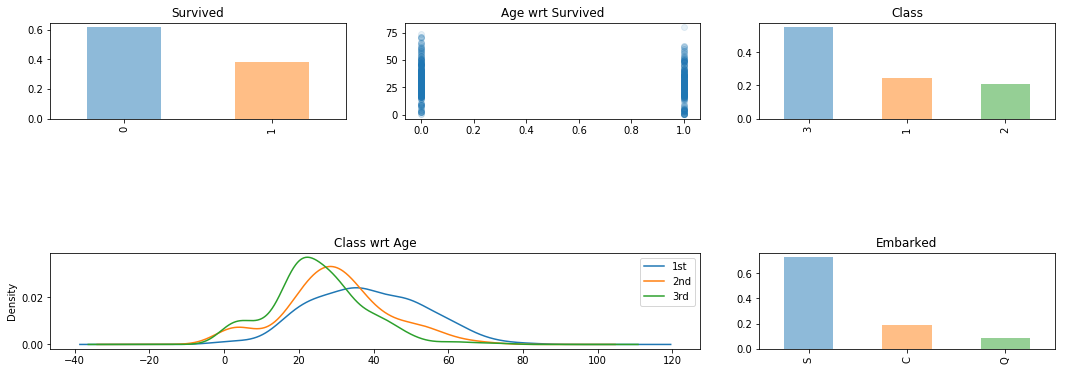

In [5]:
fig = plt.figure(figsize=(18, 6))

# first plot
plt.subplot2grid((3,3), (0,0))
df.Survived.value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Survived")

# second plot
plt.subplot2grid((3,3), (0,1))
plt.scatter(df.Survived, df.Age, alpha=0.1)
plt.title("Age wrt Survived")

# third plot
plt.subplot2grid((3,3), (0,2))
df.Pclass.value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Class")

# fourth plot
plt.subplot2grid((3,3), (2,0), colspan=2)
for x in [1, 2, 3]:
    df.Age[df.Pclass == x].plot(kind="kde")
plt.title("Class wrt Age")
plt.legend(("1st", "2nd", "3rd"))

# fifth plot
plt.subplot2grid((3,3), (2,2), colspan=2)
df.Embarked.value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Embarked")


plt.show()

##### '0' died , '1'  survived

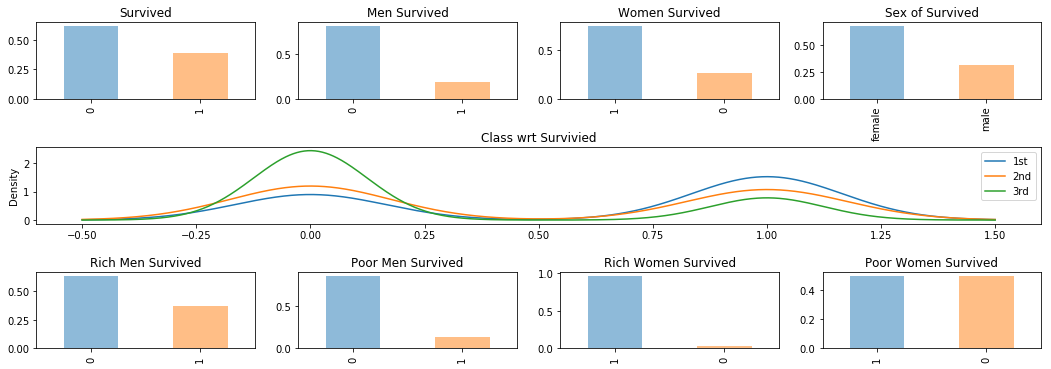

In [6]:
fig = plt.figure(figsize=(18, 6))

plt.subplot2grid((8,4), (0,0),rowspan=2)
df.Survived.value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Survived")

plt.subplot2grid((8,4), (0,1),rowspan=2)
df.Survived[df.Sex == "male"].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Men Survived")

plt.subplot2grid((8,4), (0,2),rowspan=2)
df.Survived[df.Sex == "female"].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Women Survived")

plt.subplot2grid((8,4), (0,3),rowspan=2)
df.Sex[df.Survived == 1].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Sex of Survived")

plt.subplot2grid((8,4), (3,0),rowspan=2, colspan=4)
for x in [1, 2, 3]:
    df.Survived[df.Pclass == x].plot(kind="kde")
plt.title("Class wrt Survivied")
plt.legend(("1st", "2nd", "3rd"))

plt.subplot2grid((8,4), (6,0),rowspan=2)
df.Survived[(df.Sex == "male") & (df.Pclass == 1)].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Rich Men Survived")

plt.subplot2grid((8,4), (6,1),rowspan=2)
df.Survived[(df.Sex == "male") & (df.Pclass == 3)].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Poor Men Survived")

plt.subplot2grid((8,4), (6,2),rowspan=2)
df.Survived[(df.Sex == "female") & (df.Pclass == 1)].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Rich Women Survived")

plt.subplot2grid((8,4), (6,3),rowspan=2)
df.Survived[(df.Sex == "female") & (df.Pclass == 3)].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Poor Women Survived")

plt.show()

### solution 1 ( Random solution) : make women only surviors :)

In [7]:
df = pd.read_csv("titanic_data.csv")

df['Hyp'] = 0
df.loc[df.Sex == "female", "Hyp"] = 1

df['Result'] = 0
df.loc[df.Survived == df['Hyp'], "Result"] = 1

print(df["Result"].value_counts(normalize = True))

1    0.786756
0    0.213244
Name: Result, dtype: float64


In [8]:
def clean_data (data):
    
    # fill uncomblete data
    data["Fare"] = data['Fare'].fillna(data["Fare"].dropna().median())
    data["Age"] = data["Age"].fillna(data["Age"].dropna().median())
    
    # use binary representation of sex instead of string
    data.loc[data['Sex'] == "male", "Sex"] = 0
    data.loc[data['Sex'] == "female", "Sex"] = 1
    
    # use binary representation of Embarked instead of string
    data["Embarked"] = data["Embarked"].fillna("S")
    data.loc[data["Embarked"] == "S", "Embarked"] = 0
    data.loc[data["Embarked"] == "C", "Embarked"] = 1
    data.loc[data["Embarked"] == "Q", "Embarked"] = 2

### solution 2 (Logistic_Regression)

In [9]:
df = pd.read_csv("titanic_data.csv")
clean_data(df)

target = df["Survived"].values
features_names = ["Pclass","Fare", "Embarked","PassengerId",  "Age", "Sex", "SibSp", "Parch"]
features = df[features_names].values

classifier = linear_model.LogisticRegression()
classifier_fit = classifier.fit(features, target)

print(classifier_fit.score(features, target))

0.8013468013468014


### solution 3 (second degree classifier)

In [10]:
poly = preprocessing.PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(features)

classifier_fit = classifier.fit(poly_features, target)
print(classifier_fit.score(poly_features, target))

0.8215488215488216


In [11]:
poly = preprocessing.PolynomialFeatures(degree=3)
poly_features = poly.fit_transform(features)

classifier_fit = classifier.fit(poly_features, target)
print(classifier_fit.score(poly_features, target))

0.7946127946127947


### solution 4 (decision tree)

In [12]:
decision_tree = tree.DecisionTreeClassifier(random_state=1)
decision_tree_fit = decision_tree.fit(features, target)

print(decision_tree_fit.score(features, target))

1.0


###### overfitting :(
##### let's try to simplify the model by using selection 

In [13]:
decision_tree = tree.DecisionTreeClassifier(
    random_state=1,
    max_depth = 8,
    min_samples_split = 10
)
decision_tree_fit = decision_tree.fit(features, target)

print(decision_tree_fit.score(features, target))

scores = model_selection.cross_val_score(decision_tree, features, target, scoring='accuracy', cv=50)
print(scores)
print(scores.mean())

0.8799102132435466
[0.44444444 0.5        0.72222222 0.83333333 0.83333333 0.88888889
 0.55555556 0.83333333 0.77777778 0.88888889 0.72222222 0.72222222
 0.83333333 0.77777778 0.72222222 0.66666667 0.88888889 0.77777778
 0.88888889 0.94444444 0.83333333 0.83333333 0.88888889 0.88888889
 0.83333333 0.77777778 0.83333333 0.83333333 0.77777778 0.77777778
 0.66666667 0.77777778 0.88888889 0.94444444 0.94444444 0.88888889
 0.77777778 0.61111111 0.88888889 0.83333333 0.94444444 0.83333333
 0.88235294 0.88235294 0.82352941 0.76470588 0.82352941 0.88235294
 0.94117647 1.        ]
0.81


In [14]:
tree.export_graphviz(decision_tree_fit, feature_names=features_names, out_file="tree.dot")